## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [1]:
%reload_ext nb_black
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import (
    SelectKBest,
    f_classif,
    f_regression,
    mutual_info_regression,
)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
crash_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv"
)
soccer_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv"
)

<IPython.core.display.Javascript object>

In [3]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


<IPython.core.display.Javascript object>

We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [4]:
# answer goes here
def missingness_summary(df, print_log=False, sort=None):
    missings = df.isna().mean()

    if sort == "asc":
        missings = missings.sort_values()
    elif sort == "desc":
        missings = missings.sort_values(ascending=False)

    if print_log:
        print(missings)

    return missings




<IPython.core.display.Javascript object>

In [5]:
miss_report = missingness_summary(crash_data, sort="desc")

<IPython.core.display.Javascript object>

In [6]:
miss_report["WORKERS_PRESENT_I"]

0.9983520538937424

<IPython.core.display.Javascript object>

In [7]:
drop_cols = []
for col in miss_report.index:
    if miss_report[col] > 0.05:
        drop_cols.append(col)
crash = crash_data.drop(columns=drop_cols)

<IPython.core.display.Javascript object>

In [8]:
missingness_summary(crash, sort="desc")

REPORT_TYPE                      0.023012
MOST_SEVERE_INJURY               0.005795
INJURIES_UNKNOWN                 0.005776
INJURIES_NO_INDICATION           0.005776
INJURIES_REPORTED_NOT_EVIDENT    0.005776
INJURIES_NON_INCAPACITATING      0.005776
INJURIES_INCAPACITATING          0.005776
INJURIES_FATAL                   0.005776
INJURIES_TOTAL                   0.005776
NUM_UNITS                        0.003755
BEAT_OF_OCCURRENCE               0.000011
STREET_DIRECTION                 0.000005
STREET_NAME                      0.000003
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
CRASH_DATE                       0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
TRAFFICWAY_TYPE                  0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
DATE_POLICE_NOTIFIED             0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0

<IPython.core.display.Javascript object>

Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [9]:
# answer goes here
soccer_data['Overall']
soccer_data.corr()['Overall'].abs().sort_values(ascending=False).iloc[1:6]





Reactions       0.847739
Composure       0.801749
ShortPassing    0.722720
BallControl     0.717933
LongPassing     0.585104
Name: Overall, dtype: float64

<IPython.core.display.Javascript object>

Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [10]:
soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               16122 non-null  int64 
 1   Name             16122 non-null  object
 2   Overall          16122 non-null  int64 
 3   Crossing         16122 non-null  int64 
 4   Finishing        16122 non-null  int64 
 5   HeadingAccuracy  16122 non-null  int64 
 6   ShortPassing     16122 non-null  int64 
 7   Volleys          16122 non-null  int64 
 8   Dribbling        16122 non-null  int64 
 9   Curve            16122 non-null  int64 
 10  FKAccuracy       16122 non-null  int64 
 11  LongPassing      16122 non-null  int64 
 12  BallControl      16122 non-null  int64 
 13  Acceleration     16122 non-null  int64 
 14  SprintSpeed      16122 non-null  int64 
 15  Agility          16122 non-null  int64 
 16  Reactions        16122 non-null  int64 
 17  Balance          16122 non-null

<IPython.core.display.Javascript object>

In [11]:
X = soccer_data.drop(columns=["Overall", "Name", "ID"])
y = soccer_data["Overall"]

<IPython.core.display.Javascript object>

In [12]:
# answer goes here

#f_regression
selector = SelectKBest(score_func= f_regression, k=5)

# Use `.fit()` method so the selector can 'learn' from our data
selector.fit(X, y)

# Use `.transform()` method so the selector can apply
# what it learned in `.fit()`
k_best = selector.transform(X)

# We can see/rank which features were the best
score_df = pd.DataFrame({"feature": X.columns, "f_score": selector.scores_})
score_df = score_df.sort_values("f_score", ascending=False)
print(score_df.head())




         feature       f_score
13     Reactions  41177.634074
25     Composure  29009.062753
3   ShortPassing  17626.722526
9    BallControl  17146.460079
8    LongPassing   8391.416302


<IPython.core.display.Javascript object>

In [13]:
best_soccer_f_reg_df = pd.DataFrame(k_best, columns=X.columns[selector.get_support()])

<IPython.core.display.Javascript object>

In [14]:
# mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k=5)

# Use `.fit()` method so the selector can 'learn' from our data
selector.fit(X, y)

# Use `.transform()` method so the selector can apply
# what it learned in `.fit()`
k_best = selector.transform(X)

# We can see/rank which features were the best
score_df = pd.DataFrame({"feature": X.columns, "f_score": selector.scores_})
score_df = score_df.sort_values("f_score", ascending=False)
print(score_df.head())

         feature   f_score
13     Reactions  0.570676
25     Composure  0.451858
9    BallControl  0.404295
3   ShortPassing  0.342568
5      Dribbling  0.237740


<IPython.core.display.Javascript object>

In [15]:
best_soccer_mut_info_df = pd.DataFrame(
    k_best, columns=X.columns[selector.get_support()]
)

<IPython.core.display.Javascript object>

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

In [17]:
# answer goes here
print("Feature variances before scaling:")
print(X.var().sort_values(ascending=False).head())

scaler = StandardScaler()

# 'learn' from the data
scaler.fit(X)

# apply what the scaler learned
scaled_X = pd.DataFrame(scaler.transform(X), columns=X.columns)

print("Feature variances after scaling:")
print(scaled_X.var().sort_values(ascending=False).head())




Feature variances before scaling:
StandingTackle    367.541444
SlidingTackle     367.474467
Interceptions     353.373151
Marking           296.454130
Finishing         268.221680
dtype: float64
Feature variances after scaling:
Stamina            1.000062
HeadingAccuracy    1.000062
Balance            1.000062
SprintSpeed        1.000062
Crossing           1.000062
dtype: float64


<IPython.core.display.Javascript object>

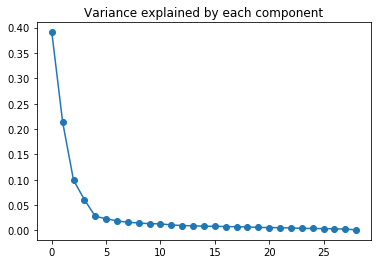

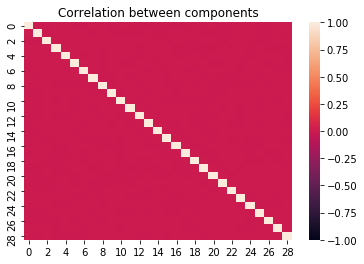

<IPython.core.display.Javascript object>

In [18]:
pca = PCA()

# 'learn' from the data
pca.fit(scaled_X)

# apply what the pca object learned
pca_X = pca.transform(scaled_X)

# What attribute holds the variance explained?
plt.plot(pca.explained_variance_ratio_, marker="o")
plt.title("Variance explained by each component")
plt.show()

# sns.heatmap(____, vmin=-1, vmax=1)
# plt.title("Correlation between components")
# plt.show()
sns.heatmap(pd.DataFrame(pca_X).corr(), vmin=-1, vmax=1)
plt.title("Correlation between components")
plt.show()